# Exploratory Data Analysis fo Heart Hisease data

### Import libraries ...

In [129]:
# import the libraries
%matplotlib inline

import pandas as pnd
import numpy as nmp
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns
# apply style to all the charts
sns.set_style('whitegrid')

### Load the data: No header row in data file!

In [130]:
df_clv = pnd.read_csv('C:\\Users\\hbenamor\\Desktop\\uc-heartdisease-datafolder\\processed.cleveland.data', header = None)
df_hds = df_clv

In [131]:
# Missing values by column: No missing values!
print(df_hds.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [132]:
# Rows with missing values: None!
df_hds[df_hds.isnull().any(axis=1)]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13


In [133]:
# Rename columns
#df_clv.rename(columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'])
df_hds.columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "n_vessels"]
df_hds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'n_vessels'],
      dtype='object')

In [134]:
df_hds.values

array([[63.0, 1.0, 1.0, ..., '0.0', '6.0', 0],
       [67.0, 1.0, 4.0, ..., '3.0', '3.0', 2],
       [67.0, 1.0, 4.0, ..., '2.0', '7.0', 1],
       ...,
       [57.0, 1.0, 4.0, ..., '1.0', '7.0', 3],
       [57.0, 0.0, 2.0, ..., '1.0', '3.0', 1],
       [38.0, 1.0, 3.0, ..., '?', '3.0', 0]], dtype=object)

In [135]:
df_hds.shape

(303, 14)

In [136]:
df_hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,n_vessels
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [137]:
df_hds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,n_vessels
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [138]:
# Some 'goal' values exceed 1 whereas they ar assumed to be either 0 or 1. They are set back to 1.
# 'thal' and 'ca' have bad values '?'. They are set to default "no issue" values for each.
#df_hds["goal"] = nmp.where(df_hds['n_vessels'] >= 1, 1, df_hds['n_vessels']) 
df_hds["ca"] = nmp.where(df_hds['ca']=='?', '0.0', df_hds['ca'])
df_hds["thal"] = nmp.where(df_hds['thal']=='?', '3.0', df_hds['thal'])

In [139]:
df_hds.dtypes

age          float64
sex          float64
cp           float64
trestbps     float64
chol         float64
fbs          float64
restecg      float64
thalach      float64
exang        float64
oldpeak      float64
slope        float64
ca            object
thal          object
n_vessels      int64
dtype: object

In [140]:
df_hds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,n_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [141]:
# sex, cp, fbs, restecg, exang, slope, goal are not numerical: transform their values.
df_mod = df_hds.copy()
#df_mod['sex']
# sex
df_mod["sex"] = nmp.where(df_hds['sex'] == 1.0, 'M', 'F')
df_mod['sex']
# cp
df_mod["cp"] = nmp.where((df_hds['cp'] == 1), 'typ_ang', df_mod['cp'])
df_mod["cp"] = nmp.where((df_hds['cp'] == 2), 'atyp_ang', df_mod['cp'])
df_mod["cp"] = nmp.where((df_hds['cp'] == 3), 'non_ang', df_mod['cp'])
df_mod["cp"] = nmp.where((df_hds['cp'] == 4), 'asymp', df_mod['cp'])
df_mod['cp']
# fbs
df_mod["fbs"] = nmp.where(df_hds['fbs'] > 0.120, 'High', 'Low')
df_mod['fbs']
# restecg
df_mod["restecg"] = nmp.where((df_hds['restecg'] == 0), 'Normal', df_mod['restecg'])
df_mod["restecg"] = nmp.where((df_hds['restecg'] == 1), 'ST-T-Abnormal', df_mod['restecg'])
df_mod["restecg"] = nmp.where((df_hds['restecg'] == 2), 'LeftVent-hyper', df_mod['restecg'])
df_mod['restecg']
# exang
df_mod["exang"] = nmp.where(df_hds['exang'] == 1.0, 'Yes', df_mod['exang'])
df_mod["exang"] = nmp.where(df_hds['exang'] == 0.0, 'No', df_mod['exang'])
df_mod['exang']
# restecg
df_mod["slope"] = nmp.where((df_hds['slope'] == 1), 'unslope', df_mod['slope'])
df_mod["slope"] = nmp.where((df_hds['slope'] == 2), 'noslope', df_mod['slope'])
df_mod["slope"] = nmp.where((df_hds['slope'] == 3), 'dnslope', df_mod['slope'])
df_mod['slope']
# n_vessels
#df_mod["n_vessels"] = nmp.where(df_hds['n_vessels'] < 0.5, 'NO vessels', '1+ vessels')
#df_mod['n_vessels']
df_mod.describe()

,age,trestbps,chol,thalach,oldpeak,n_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.937294
std,9.038662,17.599748,51.776918,22.875003,1.161075,1.228536
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [142]:
df_mod.dtypes

age          float64
sex           object
cp            object
trestbps     float64
chol         float64
fbs           object
restecg       object
thalach      float64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
n_vessels      int64
dtype: object

##### Numerical variables distributions.

count    303.0
mean      54.0
std        9.0
min       29.0
25%       48.0
50%       56.0
75%       61.0
max       77.0
Name: age, dtype: float64


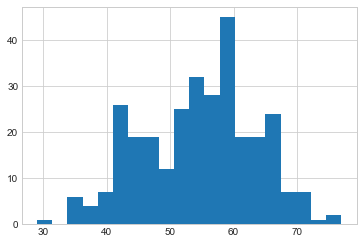

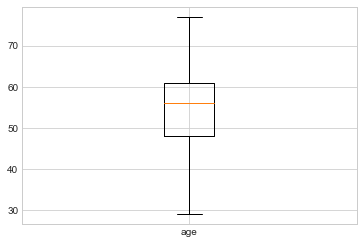

In [143]:
# Analyze age distribution

# Hisotgram
print(df_mod['age'].describe().round())
plt.hist(df_mod['age'], bins=20)
plt.show()
# Box plot: No outliers!
plt.boxplot(df_mod['age'])
plt.xticks([1], ['age'], rotation='horizontal')
plt.show()

count    303.0
mean     132.0
std       18.0
min       94.0
25%      120.0
50%      130.0
75%      140.0
max      200.0
Name: trestbps, dtype: float64


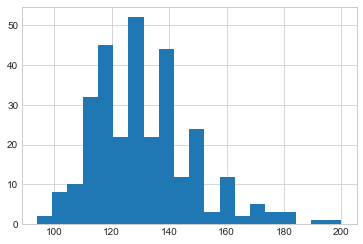

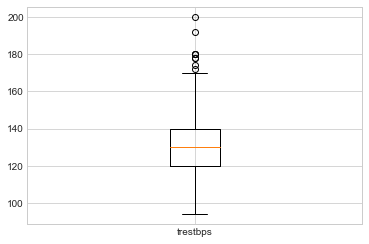

In [144]:
# Analyze resting blood pressure distribution

# Hisotgram
print(df_mod['trestbps'].describe().round())
plt.hist(df_mod['trestbps'], bins=20)
plt.show()
# Box plot: 6 outliers!
plt.boxplot(df_mod['trestbps'])
plt.xticks([1], ['trestbps'], rotation='horizontal')
plt.show()

count    303.0
mean     247.0
std       52.0
min      126.0
25%      211.0
50%      241.0
75%      275.0
max      564.0
Name: chol, dtype: float64


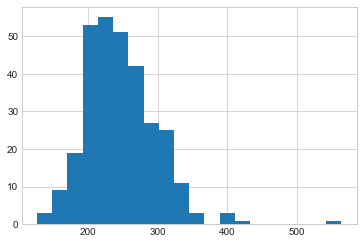

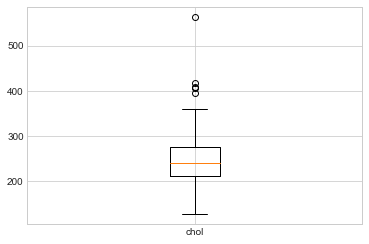

In [145]:
# Analyze cholesterol distribution

# Hisotgram
print(df_mod['chol'].describe().round())
plt.hist(df_mod['chol'], bins=20)
plt.show()
# Box plot: 4 outliers!
plt.boxplot(df_mod['chol'])
plt.xticks([1], ['chol'], rotation='horizontal')
plt.show()

count    303.0
mean     150.0
std       23.0
min       71.0
25%      134.0
50%      153.0
75%      166.0
max      202.0
Name: thalach, dtype: float64


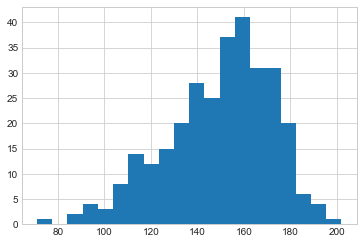

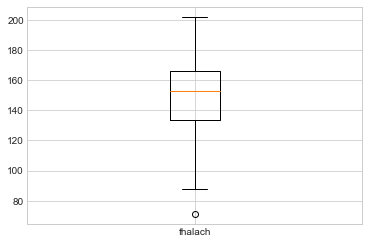

In [146]:
# Analyze maximum heart rate achieved distribution

# Hisotgram
print(df_mod['thalach'].describe().round())
plt.hist(df_mod['thalach'], bins=20)
plt.show()
# Box plot: One outlier!
plt.boxplot(df_mod['thalach'])
plt.xticks([1], ['thalach'], rotation='horizontal')
plt.show()

count    303.0
mean       1.0
std        1.0
min        0.0
25%        0.0
50%        1.0
75%        2.0
max        6.0
Name: oldpeak, dtype: float64


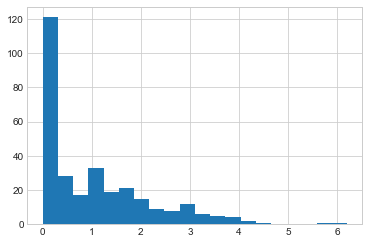

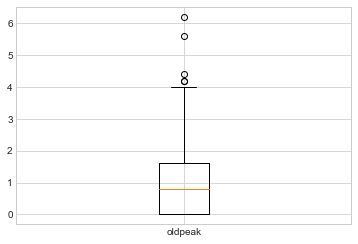

In [147]:
# Analyze ST depression induced by exercice distribution

# Hisotgram
print(df_mod['oldpeak'].describe().round())
plt.hist(df_mod['oldpeak'], bins=20)
plt.show()
# Box plot: 4 outliers!
plt.boxplot(df_mod['oldpeak'])
plt.xticks([1], ['oldpeak'], rotation='horizontal')
plt.show()

Most numerical variables have 'normal' distributions, but the shapes seem to differ. Thhey also exhibit very few outliers.

##### Categorical variables distributions

M    206
F     97
Name: sex, dtype: int64


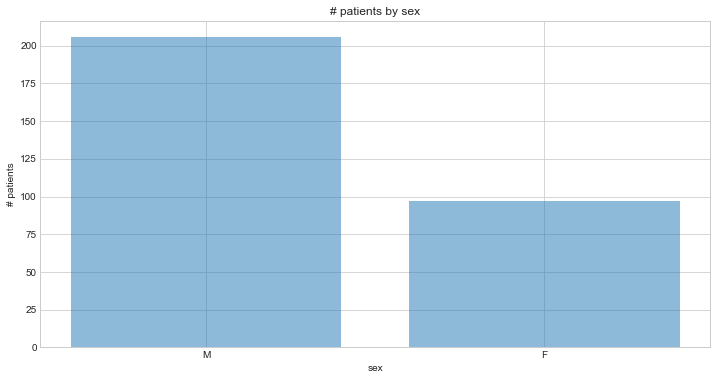

In [148]:
# Analyze sex distribution
print(df_mod['sex'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by sex')
plt.xlabel('sex')
plt.ylabel('# patients')

labels = df_mod['sex'].value_counts().index
values = df_mod['sex'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

asymp       144
non_ang      86
atyp_ang     50
typ_ang      23
Name: cp, dtype: int64


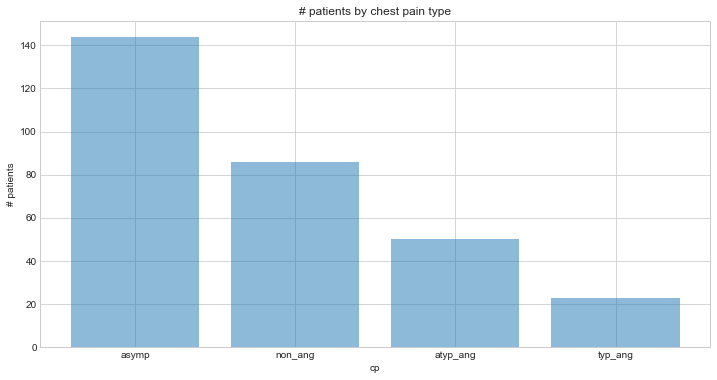

In [149]:
# Analyze  chest pain type distribution
print(df_mod['cp'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by chest pain type')
plt.xlabel('cp')
plt.ylabel('# patients')

labels = df_mod['cp'].value_counts().index
values = df_mod['cp'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Low     258
High     45
Name: fbs, dtype: int64


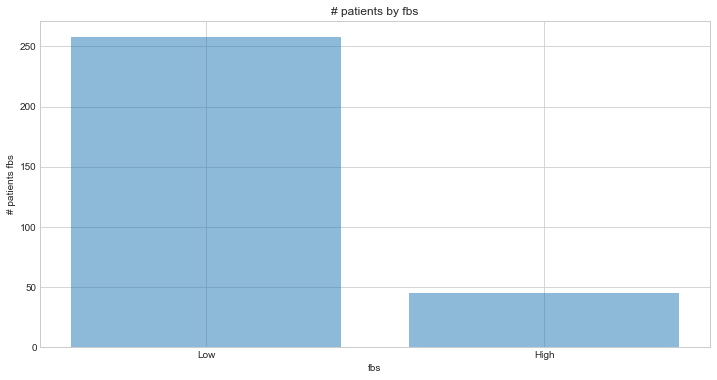

In [150]:
# Analyze fasting blood sugar distribution
print(df_mod['fbs'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by fbs')
plt.xlabel('fbs')
plt.ylabel('# patients fbs')

labels = df_mod['fbs'].value_counts().index
values = df_mod['fbs'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Normal            151
LeftVent-hyper    148
ST-T-Abnormal       4
Name: restecg, dtype: int64


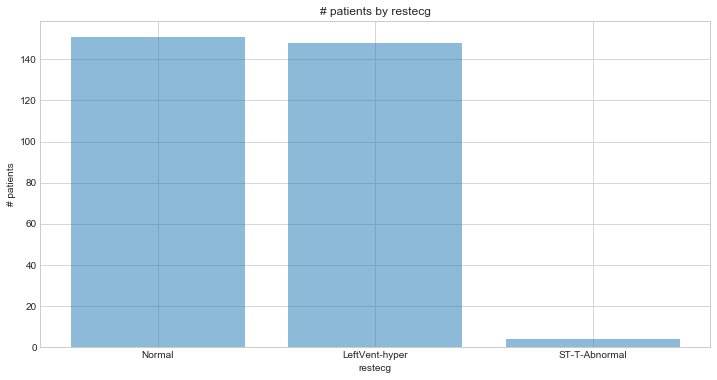

In [151]:
# Analyze resting electrocardiographic distribution
print(df_mod['restecg'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by restecg')
plt.xlabel('restecg')
plt.ylabel('# patients')

labels = df_mod['restecg'].value_counts().index
values = df_mod['restecg'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

No     204
Yes     99
Name: exang, dtype: int64


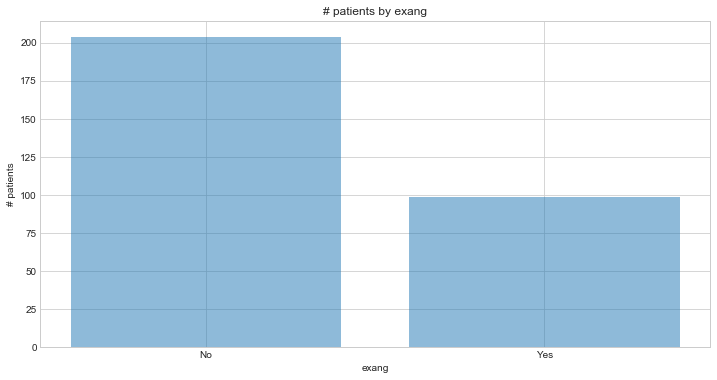

In [152]:
# Analyze exercise induced angina distribution
print(df_mod['exang'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by exang')
plt.xlabel('exang')
plt.ylabel('# patients')

labels = df_mod['exang'].value_counts().index
values = df_mod['exang'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

unslope    142
noslope    140
dnslope     21
Name: slope, dtype: int64


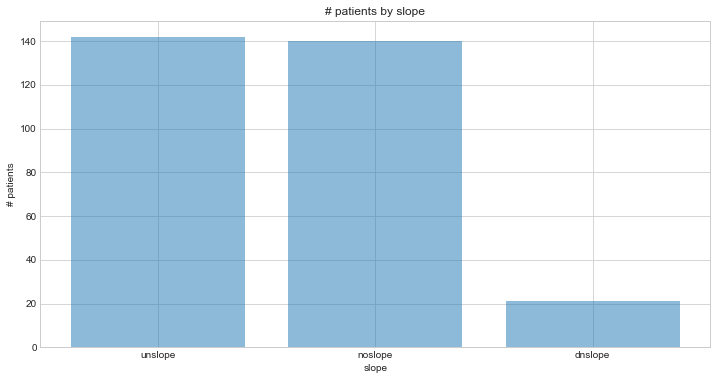

In [153]:
# Analyze slope of the peak exercise segment distribution
print(df_mod['slope'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by slope')
plt.xlabel('slope')
plt.ylabel('# patients')

labels = df_mod['slope'].value_counts().index
values = df_mod['slope'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


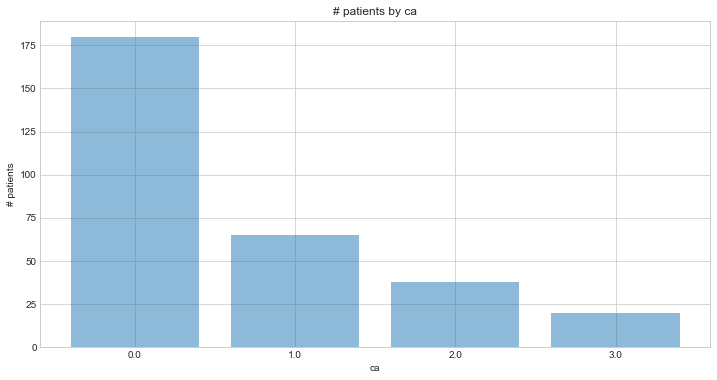

In [154]:
# Analyze number of major vessels coloured bu fluoroscopy distribution
print(df_mod['ca'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by ca')
plt.xlabel('ca')
plt.ylabel('# patients')

labels = df_mod['ca'].value_counts().index
values = df_mod['ca'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64


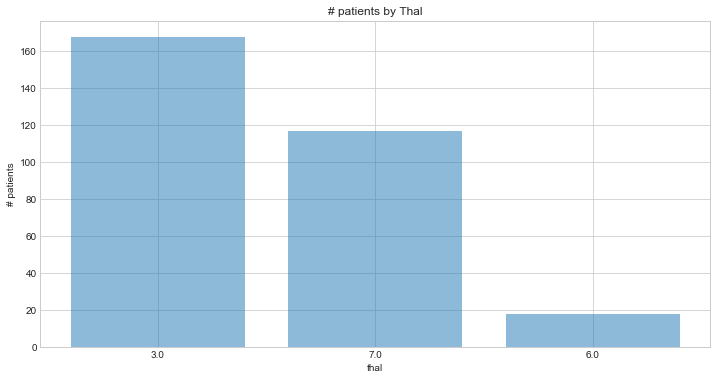

In [350]:
# Analyze Thalium stress test distribution
print(df_mod['thal'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by Thal')
plt.xlabel('thal')
plt.ylabel('# patients')

labels = df_mod['thal'].value_counts().index
values = df_mod['thal'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

0    164
1     55
2     36
3     35
4     13
Name: n_vessels, dtype: int64


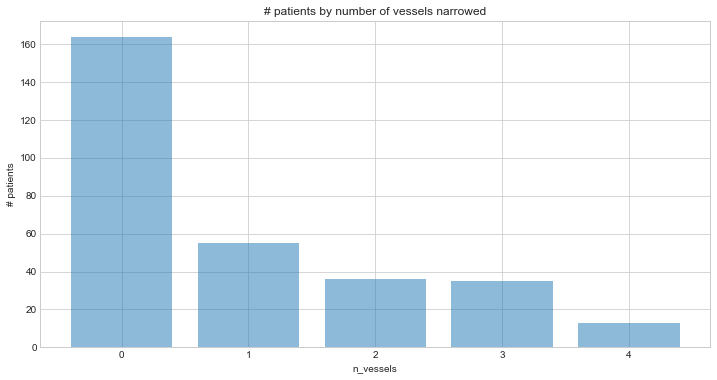

In [156]:
# Analyze  goal distribution
print(df_mod['n_vessels'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# patients by number of vessels narrowed')
plt.xlabel('n_vessels')
plt.ylabel('# patients')

labels = df_mod['n_vessels'].value_counts().index
values = df_mod['n_vessels'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Categorical variables seem to have different distributions. It is not obvious if there is any dependencies between them.

##### Correlation

In [157]:
# numerical variables correlations are not strong.
df_mod.corr()

,age,trestbps,chol,thalach,oldpeak,n_vessels
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.222853
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171,0.157754
chol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.070909
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.415040
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.504092
n_vessels,0.222853,0.157754,0.070909,-0.415040,0.504092,1.000000


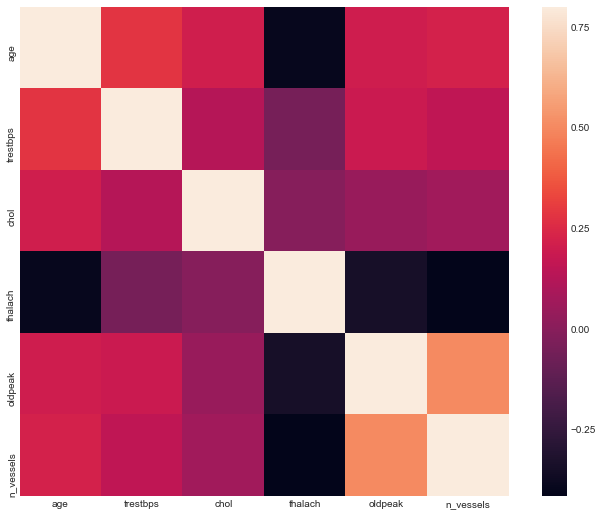

In [158]:
# heatmap
corrmat = df_mod.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There is no very string correlation between variables and there are 3 pairs that have weak correlation. Others have significant values of correlaton coefficients. 

##### Multiple variables visualization: goal vs. numerical variables.

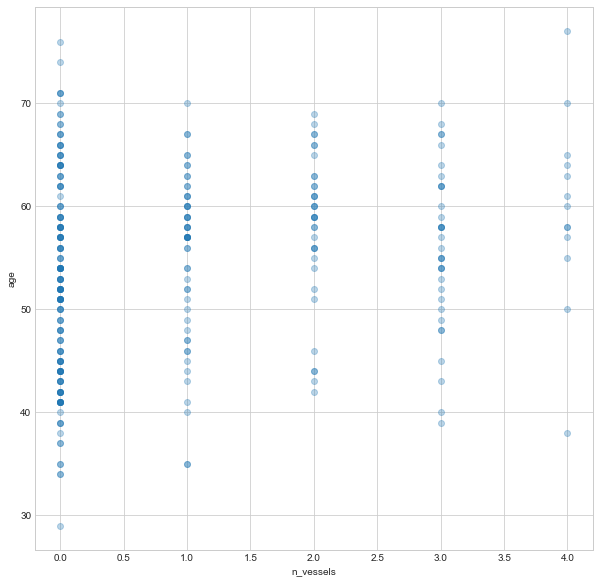

In [159]:
# Visualization of the correlation between goal x age

plt.figure(figsize=(10,10))
plt.xlabel('n_vessels')
plt.ylabel('age')


plt.plot( df_mod['n_vessels'], df_mod['age'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


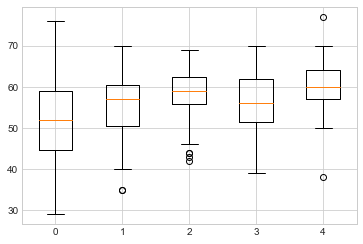

In [160]:
# Box plot to show the distribution between age x goal
values = []
labels = []
for goal in sorted(df_mod['n_vessels'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['n_vessels']==goal]['age'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

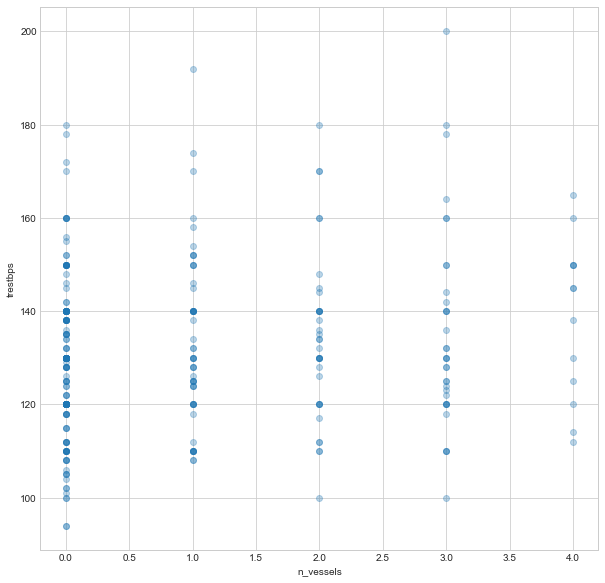

In [161]:
# Visualization of the correlation between goal x trestbps

plt.figure(figsize=(10,10))
plt.xlabel('n_vessels')
plt.ylabel('trestbps')


plt.plot( df_mod['n_vessels'], df_mod['trestbps'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


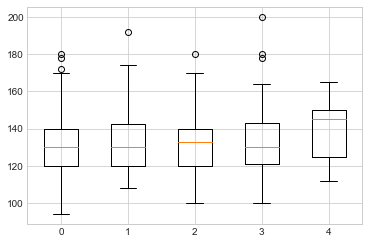

In [162]:
# Box plot to show the distribution between trestbps x goal
values = []
labels = []
for goal in sorted(df_mod['n_vessels'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['n_vessels']==goal]['trestbps'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

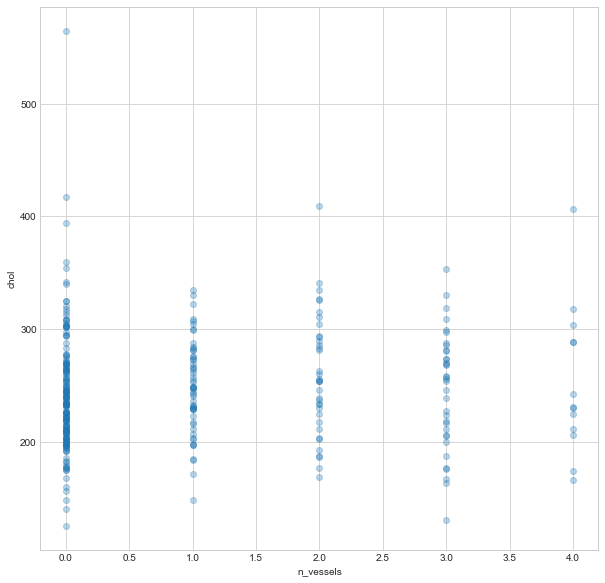

In [163]:
# Visualization of the correlation between goal x cholesterol

plt.figure(figsize=(10,10))
plt.xlabel('n_vessels')
plt.ylabel('chol')


plt.plot( df_mod['n_vessels'], df_mod['chol'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


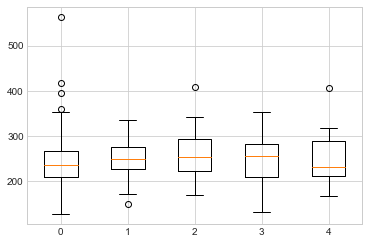

In [164]:
# Box plot to show the distribution between chol x goal
values = []
labels = []
for goal in sorted(df_mod['n_vessels'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['n_vessels']==goal]['chol'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

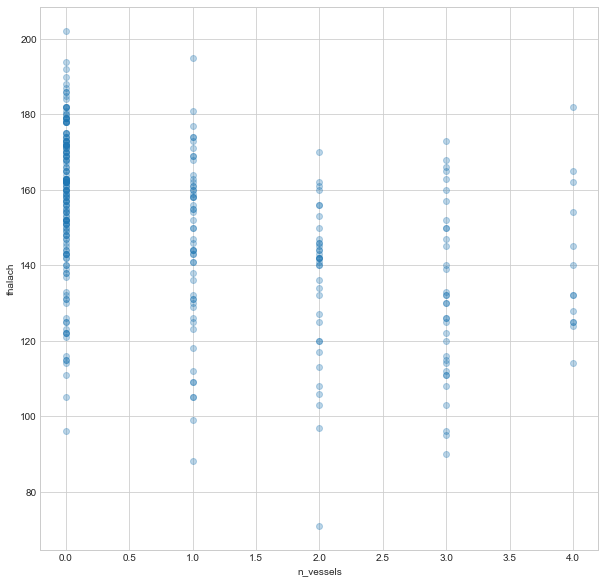

In [165]:
# Visualization of the correlation between goal x thalach

plt.figure(figsize=(10,10))
plt.xlabel('n_vessels')
plt.ylabel('thalach')


plt.plot( df_mod['n_vessels'], df_mod['thalach'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


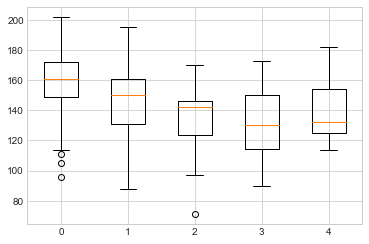

In [166]:
# Box plot to show the distribution between thalach x goal
values = []
labels = []
for goal in sorted(df_mod['n_vessels'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['n_vessels']==goal]['thalach'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

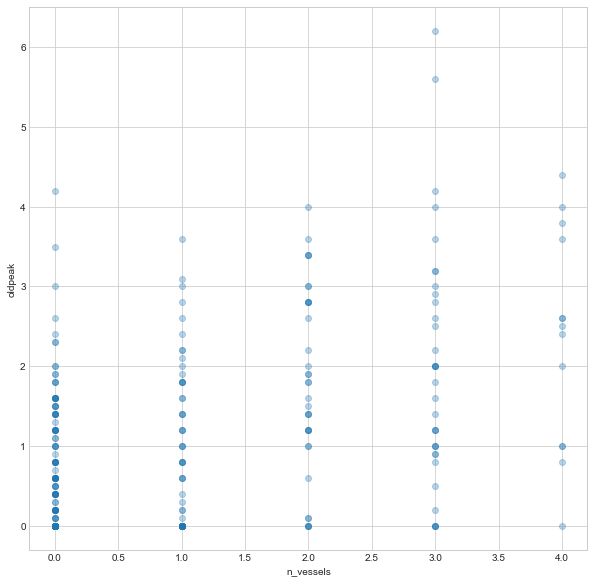

In [167]:
# Visualization of the correlation between goal x oldpeak

plt.figure(figsize=(10,10))
plt.xlabel('n_vessels')
plt.ylabel('oldpeak')


plt.plot( df_mod['n_vessels'], df_mod['oldpeak'], 'o', alpha=0.3)
plt.show()

C:\Users\hbenamor\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


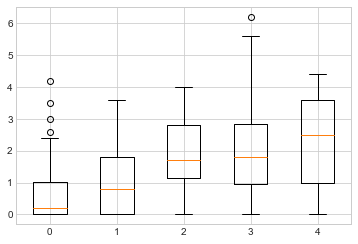

In [168]:
# Box plot to show the distribution between oldpeak x goal
values = []
labels = []
for goal in sorted(df_mod['n_vessels'].unique()):
    labels.append(goal)
    values.append(df_mod[df_mod['n_vessels']==goal]['oldpeak'])

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

The plots and boxplots show the mainly the same distributions. Many among them present close-ton-normal distributions which suggests that they may not impact the distribution of the number of narrowed vessels (or the goal) in a significant manner. However, the median values of some variables, e.g. old peak, seam to exhibit a certain relation with the number of narrowed vessels.

##### Multiple variables visualization: goal vs. categorical variables.

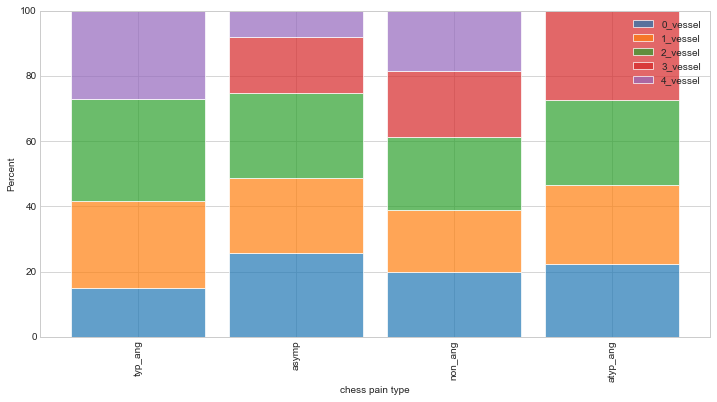

In [285]:
# Add id column
df_id = pnd.DataFrame({'id': range(0, len(df_mod), 1)})
df_id
df_ext = pnd.concat([df_id, df_mod], axis=1)
#df_ext.head()
#print(df_ext.loc[(df_ext['n_vessels'] != 0) & (df_ext['n_vessels'] != 1) & (df_ext['n_vessels'] != 2) &
#                (df_ext['n_vessels'] != 3) & (df_ext['n_vessels'] != 4)])

#count  number of patients by chest pain and heart disease diagnosis
#nb_vessels = [0,1, 2, 3, 4]
cp = df_ext['cp'].unique()
r = range(len(cp))

df_group = df_ext.groupby(['cp', 'n_vessels'])['id'].count().reset_index()
df_group = df_ext.pivot_table(index='cp', columns = 'n_vessels', values='id')
df_group = df_group[[0,1,2,3,4]]
#fix some values
df_group[4] = nmp.where(nmp.isnan(df_group[4]), 0, df_group[4])
df_group[3] = nmp.where(nmp.isnan(df_group[3]), 0, df_group[3])
#df_group.head(20)

df_group.columns = ['0_vessel','1_vessel','2_vessels','3_vessels','4_vessels']
df_group = df_group.sort_values(['0_vessel','1_vessel','2_vessels','3_vessels','4_vessels'])

raw_data = {'0_vessel': df_group['0_vessel'].values, 
            '1_vessel': df_group['1_vessel'].values,
            '2_vessels': df_group['2_vessels'].values,
            '3_vessels': df_group['3_vessels'].values,
            '4_vessels': df_group['4_vessels'].values
           }

raw_data
# From raw value to percentage
totals = [float(i+j+k+l+m) for i,j,k,l,m in zip(raw_data['0_vessel'],raw_data['1_vessel'],raw_data['2_vessels'],raw_data['3_vessels'],raw_data['4_vessels'])]
nv0Bars = [i / j * 100 for i,j in zip(raw_data['0_vessel'], totals)]
nv1Bars = [i / j * 100 for i,j in zip(raw_data['1_vessel'], totals)]
nv2Bars = [i / j * 100 for i,j in zip(raw_data['2_vessels'], totals)]
nv3Bars = [i / j * 100 for i,j in zip(raw_data['3_vessels'], totals)]
nv4Bars = [i / j * 100 for i,j in zip(raw_data['4_vessels'], totals)]
#nv4Bars

# plot
barWidth = 0.85
names = cp
plt.figure(figsize=(12,6))
# Create Bars
plt.bar(r, nv0Bars, edgecolor='white', width=barWidth, alpha=0.7, label='0_vessel')
plt.bar(r, nv1Bars, bottom=nv0Bars, edgecolor='white', width=barWidth, alpha=0.7, label='1_vessel')
plt.bar(r, nv2Bars, bottom=[i+j for i,j in zip(nv0Bars, nv1Bars)], edgecolor='white', width=barWidth, alpha=0.7, label='2_vessel')
plt.bar(r, nv3Bars, bottom=[i+j+k for i,j,k in zip(nv0Bars, nv1Bars, nv2Bars)], edgecolor='white', width=barWidth, alpha=0.7, label='3_vessel')
plt.bar(r, nv4Bars, bottom=[i+j+k+l for i,j,k,l in zip(nv0Bars, nv1Bars, nv2Bars, nv3Bars)], edgecolor='white', width=barWidth, alpha=0.7, label='4_vessel')

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("chess pain type")

plt.legend()

# Show graphic
plt.show()


Some aspects seem to follow the expectations with the common knowledge about heart disease bit others seem to be a bot surprising. For exmple, the fact that ths asymptomatic chest pain is the type where the least ratio of norrowed vessels is observed, whereas one may expect this to be the case for the non-angina chest pain type. And the chest pain type does not clearly point to a major direction w.r.t. the number of vessels that are narrowed by more than 50%.

cp            non_ang       asymp    atyp_ang  typ_ang
n_vessels                                             
0          142.676471  152.769231  160.634146  117.125
1          126.666667  146.171429  177.333333  207.200
2          145.500000  171.566667  187.000000  243.000
3           95.000000  156.310345  199.000000    0.000
4           45.000000  141.000000    0.000000  211.000
{'non_ang': array([142.67647059, 126.66666667, 145.5       ,  95.        ,
        45.        ]), 'asymp': array([152.76923077, 146.17142857, 171.56666667, 156.31034483,
       141.        ]), 'atyp_ang': array([160.63414634, 177.33333333, 187.        , 199.        ,
         0.        ]), 'typ_ang': array([117.125, 207.2  , 243.   ,   0.   , 211.   ])}


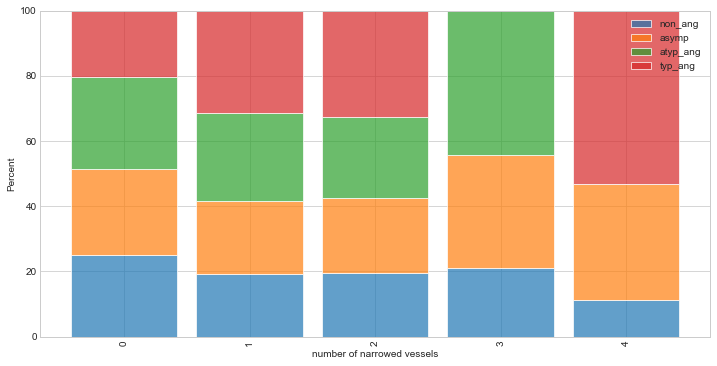

In [351]:
# Reverse point of view: number of patients by chest pain and heart disease diagnosis
# This viewpoint helps understanding better the relation chest pain type -> number of narrowed vessels.
cp = df_ext['cp'].unique()
#print(cp)
n_vessels = df_ext['n_vessels'].unique()
#print(n_vessels)
r = range(len(n_vessels))

df_group = df_ext.groupby(['n_vessels', 'cp'])['id'].count().reset_index()
#print(df_group)
df_group = df_ext.pivot_table(index='n_vessels', columns = 'cp', values='id')
#print(df_group)
df_group = df_group[['non_ang', 'asymp','atyp_ang','typ_ang']]
#print(df_group)
#fix some values
df_group['atyp_ang'] = nmp.where(nmp.isnan(df_group['atyp_ang']), 0, df_group['atyp_ang'])
df_group['typ_ang'] = nmp.where(nmp.isnan(df_group['typ_ang']), 0, df_group['typ_ang'])
print(df_group)

#df_group = df_group.sort_values(['non_ang','asymp','atyp_ang','typ_ang'])
#print(df_group)
raw_data = {'non_ang': df_group['non_ang'].values,
            'asymp': df_group['asymp'].values, 
            'atyp_ang': df_group['atyp_ang'].values,
            'typ_ang': df_group['typ_ang'].values
           }
print(raw_data)
# From raw value to percentage
totals = [float(i+j+k+l) for i,j,k,l in zip(raw_data['non_ang'],raw_data['asymp'],
                                            raw_data['atyp_ang'],raw_data['typ_ang'])]
non_angBars  = [i / j * 100 for i,j in zip(raw_data['non_ang'], totals)]
asympBars    = [i / j * 100 for i,j in zip(raw_data['asymp'], totals)]
atyp_angBars = [i / j * 100 for i,j in zip(raw_data['atyp_ang'], totals)]
typ_angBars  = [i / j * 100 for i,j in zip(raw_data['typ_ang'], totals)]

# plot
barWidth = 0.85
names = [0,1,2,3,4]#n_vessels
plt.figure(figsize=(12,6))
# Create Bars
plt.bar(r, non_angBars, 
        edgecolor='white', width=barWidth, alpha=0.7, label='non_ang')
plt.bar(r, asympBars, bottom=non_angBars, 
        edgecolor='white', width=barWidth, alpha=0.7, label='asymp')
plt.bar(r, atyp_angBars, bottom=[i+j for i,j in zip(non_angBars, asympBars)], 
        edgecolor='white', width=barWidth, alpha=0.7, label='atyp_ang')
plt.bar(r, typ_angBars, bottom=[i+j+k for i,j,k in zip(non_angBars, asympBars, atyp_angBars)], 
        edgecolor='white', width=barWidth, alpha=0.7, label='typ_ang')

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("number of narrowed vessels")

plt.legend()

# Show graphic
plt.show()

The results here make more sense as, for example, the non-angina chest pain type ratio is by far smaller than the typical angina chest pain type ratio among people having 4 major vessels that are narrowed. The results suggest that the chest pain type variable would be a significant element in predicting the heart disease presence for patients. 

               normal  fixed_defect  reversible_defect
n_vessels                                             
0          147.023077    126.333333         151.750000
1          166.818182     95.666667         146.633333
2          182.500000    218.166667         154.090909
3          179.833333    296.000000         140.571429
4          212.500000    229.500000         102.555556
{'normal': array([147.02307692, 166.81818182, 182.5       , 179.83333333,
       212.5       ]), 'fixed_defect': array([126.33333333,  95.66666667, 218.16666667, 296.        ,
       229.5       ]), 'reversible_defect': array([151.75      , 146.63333333, 154.09090909, 140.57142857,
       102.55555556])}


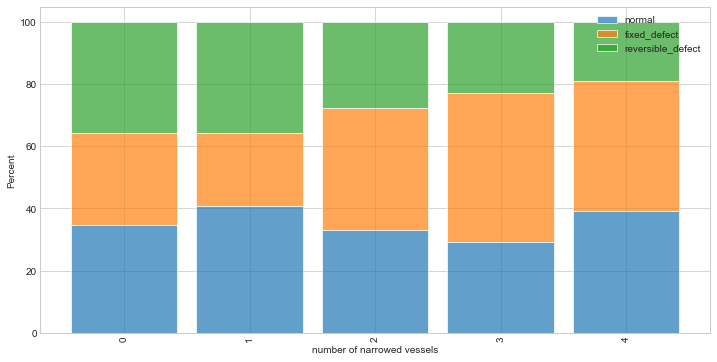

In [349]:
# Reverse point of view: number of patients by chest pain and heart disease diagnosis
# This viewpoint helps understanding better the relation thalassius stres test result -> number of narrowed vessels.
thal = df_ext['thal'].unique()
#print(thal)
n_vessels = df_ext['n_vessels'].unique()
#print(n_vessels)
r = range(len(n_vessels))

df_group = df_ext.groupby(['n_vessels', 'thal'])['id'].count().reset_index()
#print(df_group)
df_group = df_ext.pivot_table(index='n_vessels', columns = 'thal', values='id')
#print(df_group)
df_group = df_group[['3.0', '6.0', '7.0']]
df_group.columns = ['normal', 'fixed_defect', 'reversible_defect']
print(df_group)

#df_group = df_group.sort_values(['non_ang','asymp','atyp_ang','typ_ang'])
#print(df_group)
raw_data = {'normal': df_group['normal'].values,
            'fixed_defect': df_group['fixed_defect'].values, 
            'reversible_defect': df_group['reversible_defect'].values
           }
print(raw_data)
# From raw value to percentage
totals = [float(i+j+k) for i,j,k in zip(raw_data['normal'],raw_data['fixed_defect'],raw_data['reversible_defect'])]
normalBars  = [i / j * 100 for i,j in zip(raw_data['normal'], totals)]
fixed_defectBars    = [i / j * 100 for i,j in zip(raw_data['fixed_defect'], totals)]
reversible_defectBars = [i / j * 100 for i,j in zip(raw_data['reversible_defect'], totals)]

# plot
barWidth = 0.85
names = [0,1,2,3,4]
plt.figure(figsize=(12,6))
# Create Bars
plt.bar(r, normalBars, 
        edgecolor='white', width=barWidth, alpha=0.7, label='normal')
plt.bar(r, fixed_defectBars, bottom=normalBars, 
        edgecolor='white', width=barWidth, alpha=0.7, label='fixed_defect')
plt.bar(r, reversible_defectBars, bottom=[i+j for i,j in zip(normalBars, fixed_defectBars)], 
        edgecolor='white', width=barWidth, alpha=0.7, label='reversible_defect')

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("number of narrowed vessels")

plt.legend()

# Show graphic
plt.show()

The results show that it is not obvious to draw a clear relationship between the goal and other categorical variables, even if these variables seem to have a significant impact on the heart dosease versict.